# **Random Forest**

**🧠 Question:
Use the Wine dataset from sklearn.datasets to classify wine types using a Random Forest classifier. Your tasks are:**

##### 1) Load the Wine dataset and explore its features and classes.

##### 2) Split the dataset into training and test sets (80-20 split).

##### 3) Train a Random Forest Classifier.

##### 4) Evaluate the model using accuracy, confusion matrix, and classification report.

##### 5) (Optional) Show the feature importances and visualize them with a bar plot.
##### 6) (Optional) plot the Decision tree of a random forest.
##### 7) (Optional) Plot MSE of each decision tree of random forest.
##### 8) (Optional) plot How mse is reducing when we increase the decision tree in randomforest

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
lw = load_wine()

In [3]:
lv = lw.data

In [5]:
data = pd.DataFrame(lv, columns=lw.feature_names)

In [6]:
data['target'] = lw.target

In [7]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
X = data.drop(columns={'target'})
y = data['target']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [10]:
rf = RandomForestClassifier()

In [11]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
y_pred_rf = rf.predict(X_test)

In [13]:
accuracy_score(y_test, y_pred_rf)

1.0

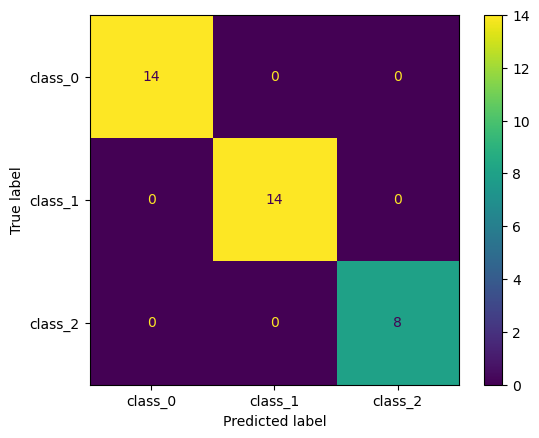

In [14]:
cm = confusion_matrix(y_test, y_pred_rf)
cmd = ConfusionMatrixDisplay(cm, display_labels=lw.target_names)
cmd.plot()

In [15]:
importance = rf.feature_importances_
f_n = lw.feature_names
i_f = pd.DataFrame({'importance' : importance,
                    'feature names' : f_n})


In [16]:
i_f

,importance,feature names
0,0.105811,alcohol
1,0.026813,malic_acid
2,0.010631,ash
3,0.045944,alcalinity_of_ash
4,0.035871,magnesium
5,0.035662,total_phenols
6,0.162838,flavanoids
7,0.007288,nonflavanoid_phenols
8,0.016600,proanthocyanins
9,0.175162,color_intensity


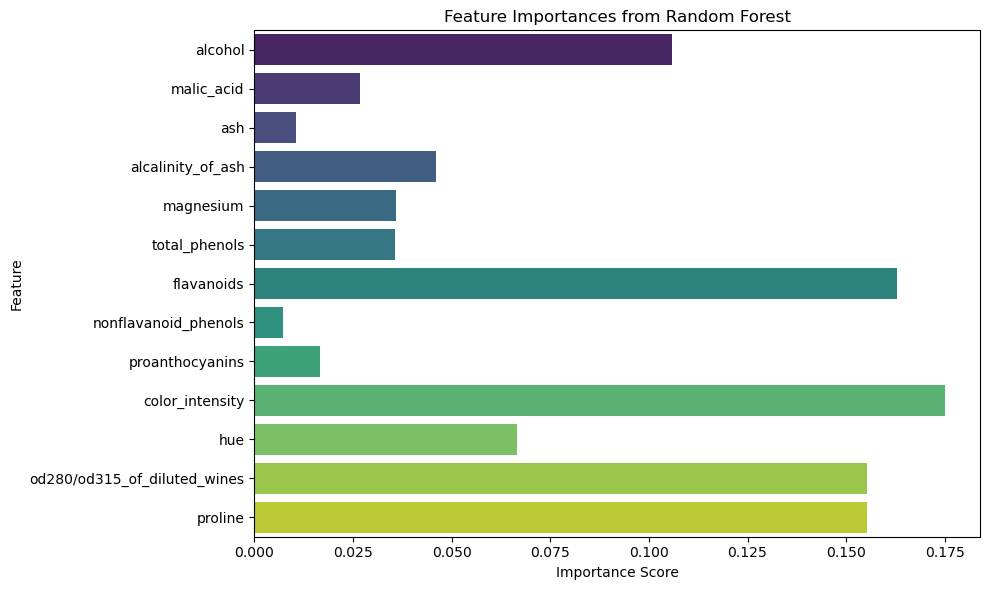

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(i_f, x='importance', y='feature names', palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [18]:
tree_to_plot = rf.estimators_[99]

In [19]:
tree_to_plot

DecisionTreeClassifier(max_features='sqrt', random_state=532225939)

[Text(0.5, 0.9, 'alcohol <= 12.685\ngini = 0.665\nsamples = 87\nvalue = [49, 50, 43]\nclass = class_1'),
 Text(0.25, 0.7, 'nonflavanoid_phenols <= 0.465\ngini = 0.32\nsamples = 36\nvalue = [0, 44, 11]\nclass = class_1'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'flavanoids <= 0.755\ngini = 0.093\nsamples = 29\nvalue = [0, 39, 2]\nclass = class_1'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 2]\nclass = class_2'),
 Text(0.1875, 0.3, 'gini = 0.0\nsamples = 28\nvalue = [0, 39, 0]\nclass = class_1'),
 Text(0.375, 0.5, 'flavanoids <= 1.165\ngini = 0.459\nsamples = 7\nvalue = [0, 5, 9]\nclass = class_2'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 9]\nclass = class_2'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 5, 0]\nclass = class_1'),
 Text(0.75, 0.7, 'od280/od315_of_diluted_wines <= 2.42\ngini = 0.543\nsamples = 51\nvalue = [49, 6, 32]\nclass = class_0'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'hue <= 0.99\ngini = 0.111\nsamp

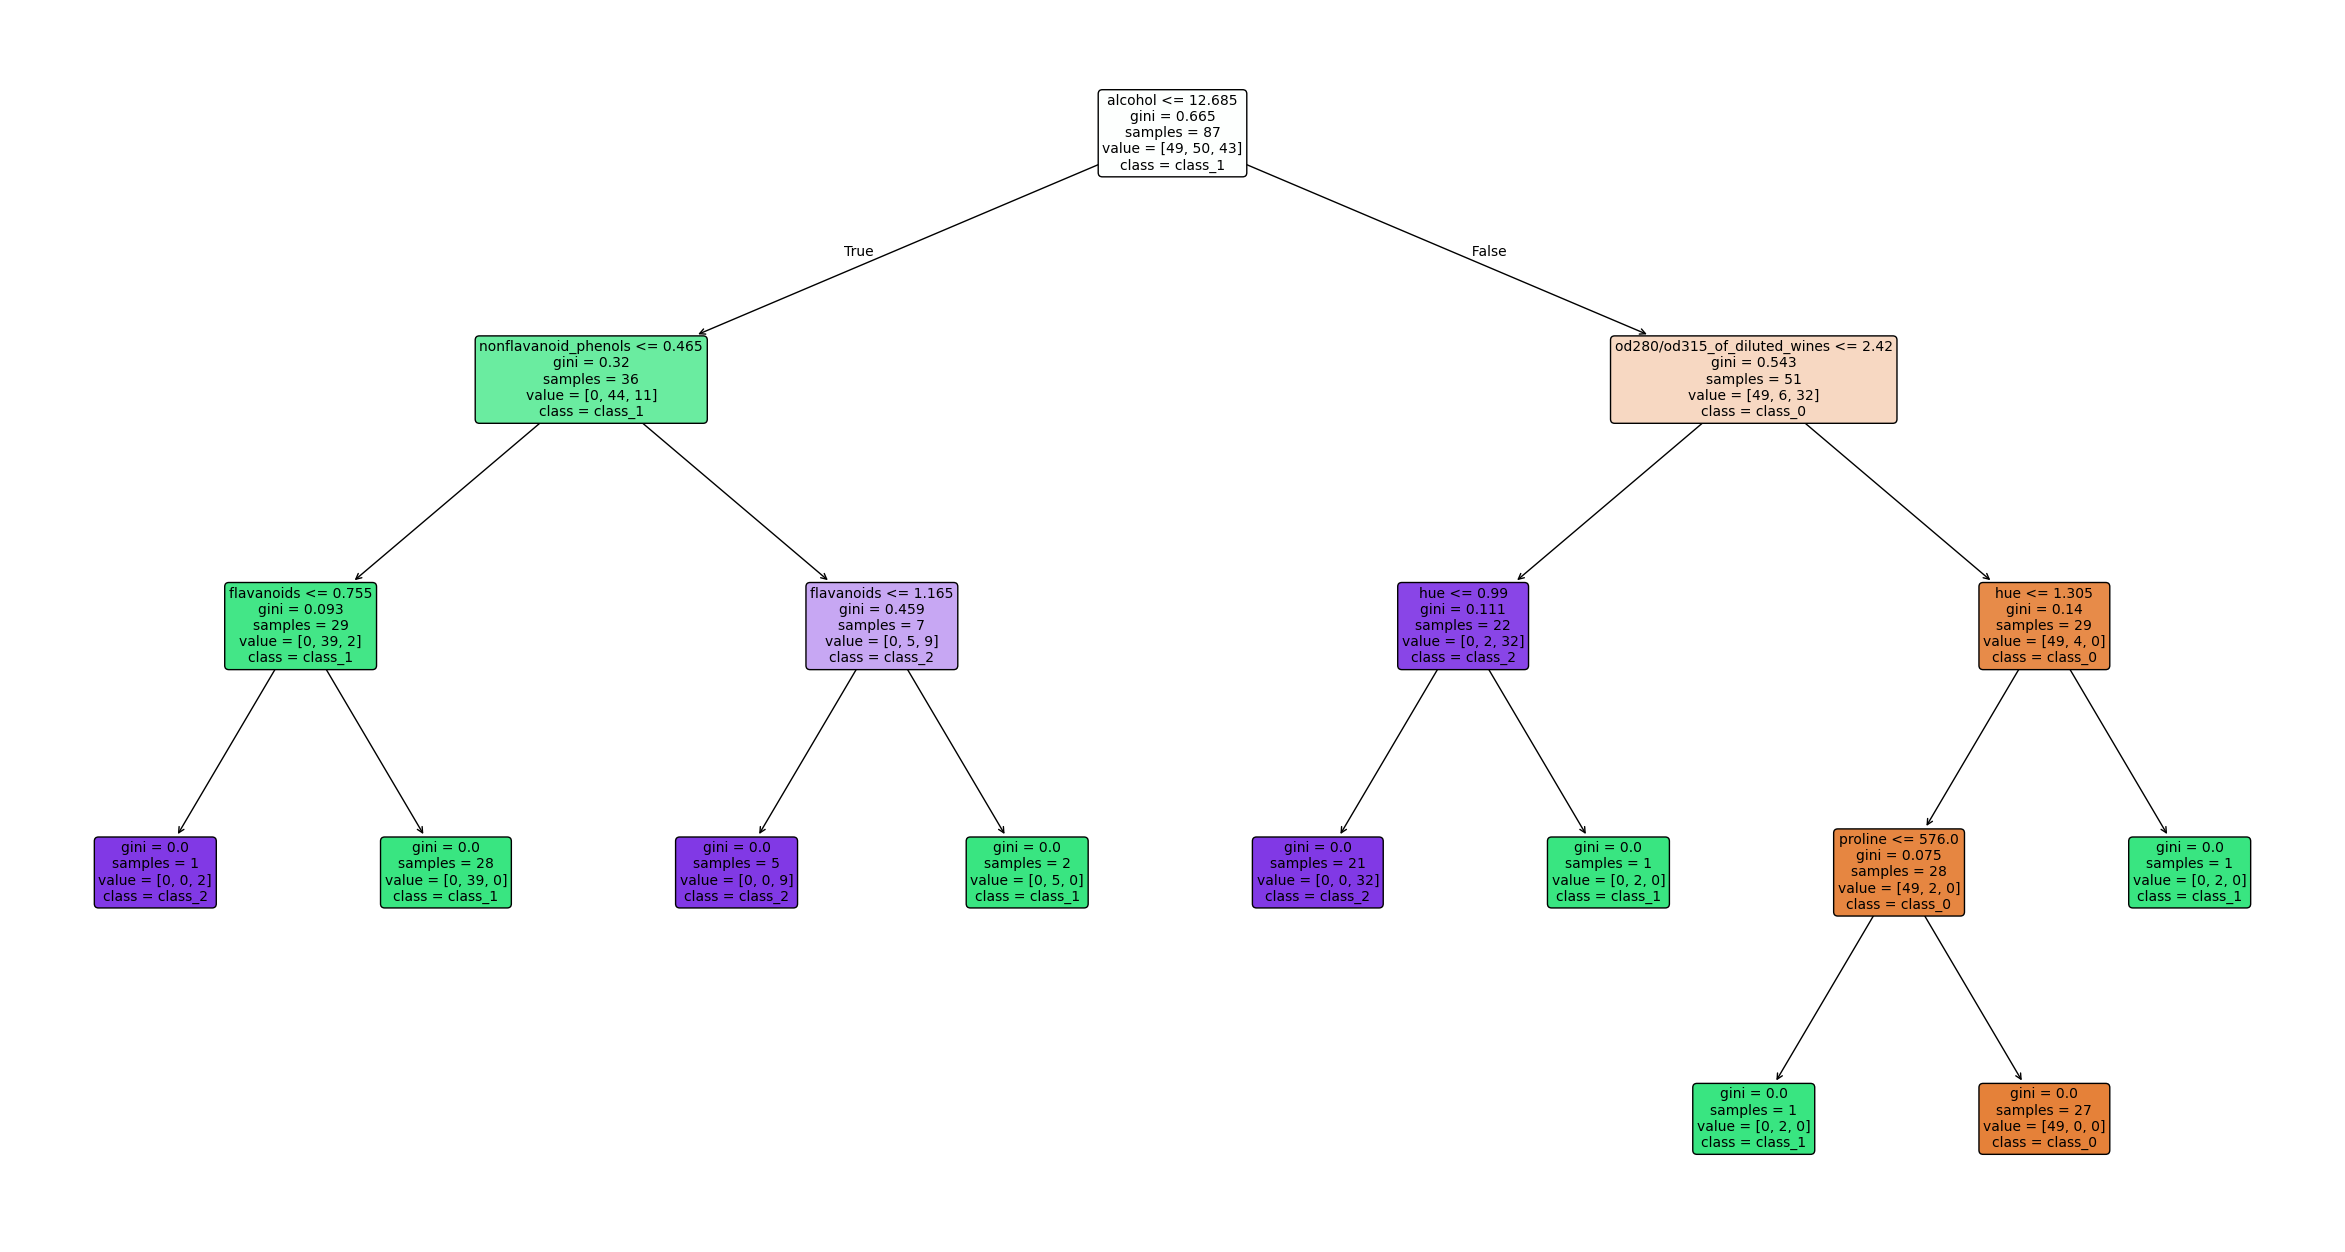

In [20]:
plt.figure(figsize=(30,16))
plot_tree(tree_to_plot, feature_names=lw.feature_names, class_names=lw.target_names, filled=True, rounded=True, fontsize=10)


In [21]:
def mse_score(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [22]:
tree = []
mse_s = []
for i in range(100):
    dt = rf.estimators_[i]
    y_pred = dt.predict(X_test)
    mse = mse_score(y_test, y_pred)
    tree.append(i)
    mse_s.append(mse)

In [23]:
t_m = pd.DataFrame({'Tree': tree, 
                    'MSE' : mse_s})

([<matplotlib.axis.XTick at 0x257ebcd69f0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39'),
  Text(40, 0, '40'),
  Text(41, 0, '41'),
  Text(42, 0, '42'),
  Text(43, 0, '43'),
  Text(44, 0, '44'),
  Text(45, 0, '45'),
  Text(46,

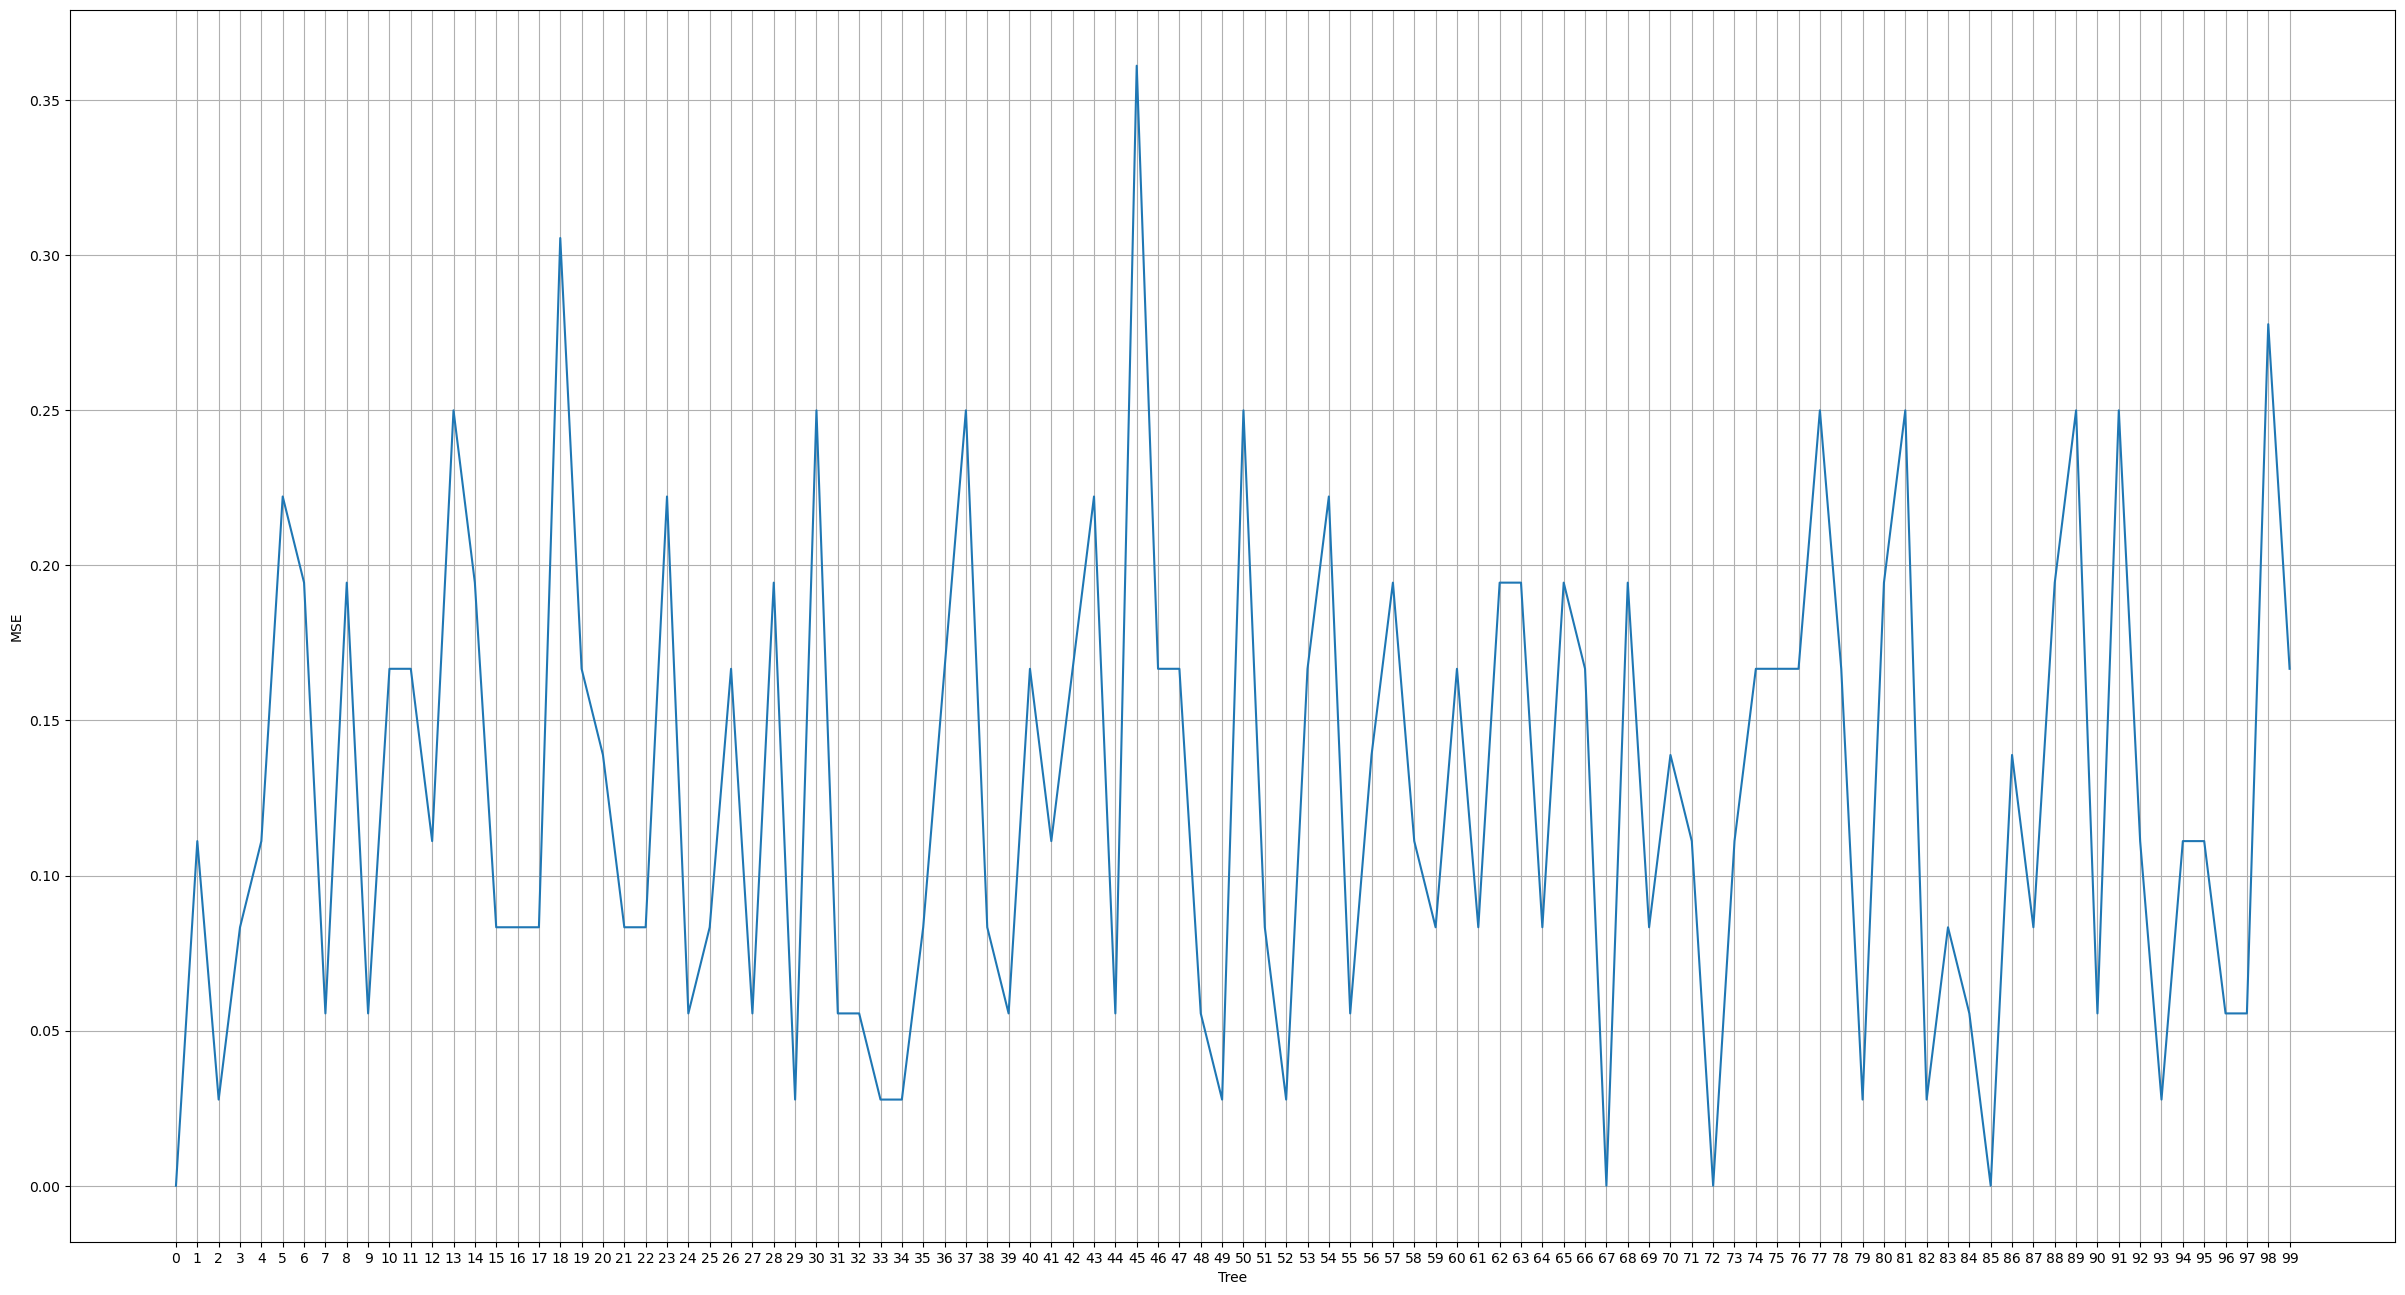

In [24]:
plt.figure(figsize=(30,16))
sns.lineplot(t_m, y = t_m['MSE'], x=t_m['Tree'])
plt.grid(True)
plt.xticks(range(len(mse_s)))

In [25]:
mse_l = []
for i in range(1,100):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mse = mse_score(y_test,y_pred)
    mse_l.append(mse)

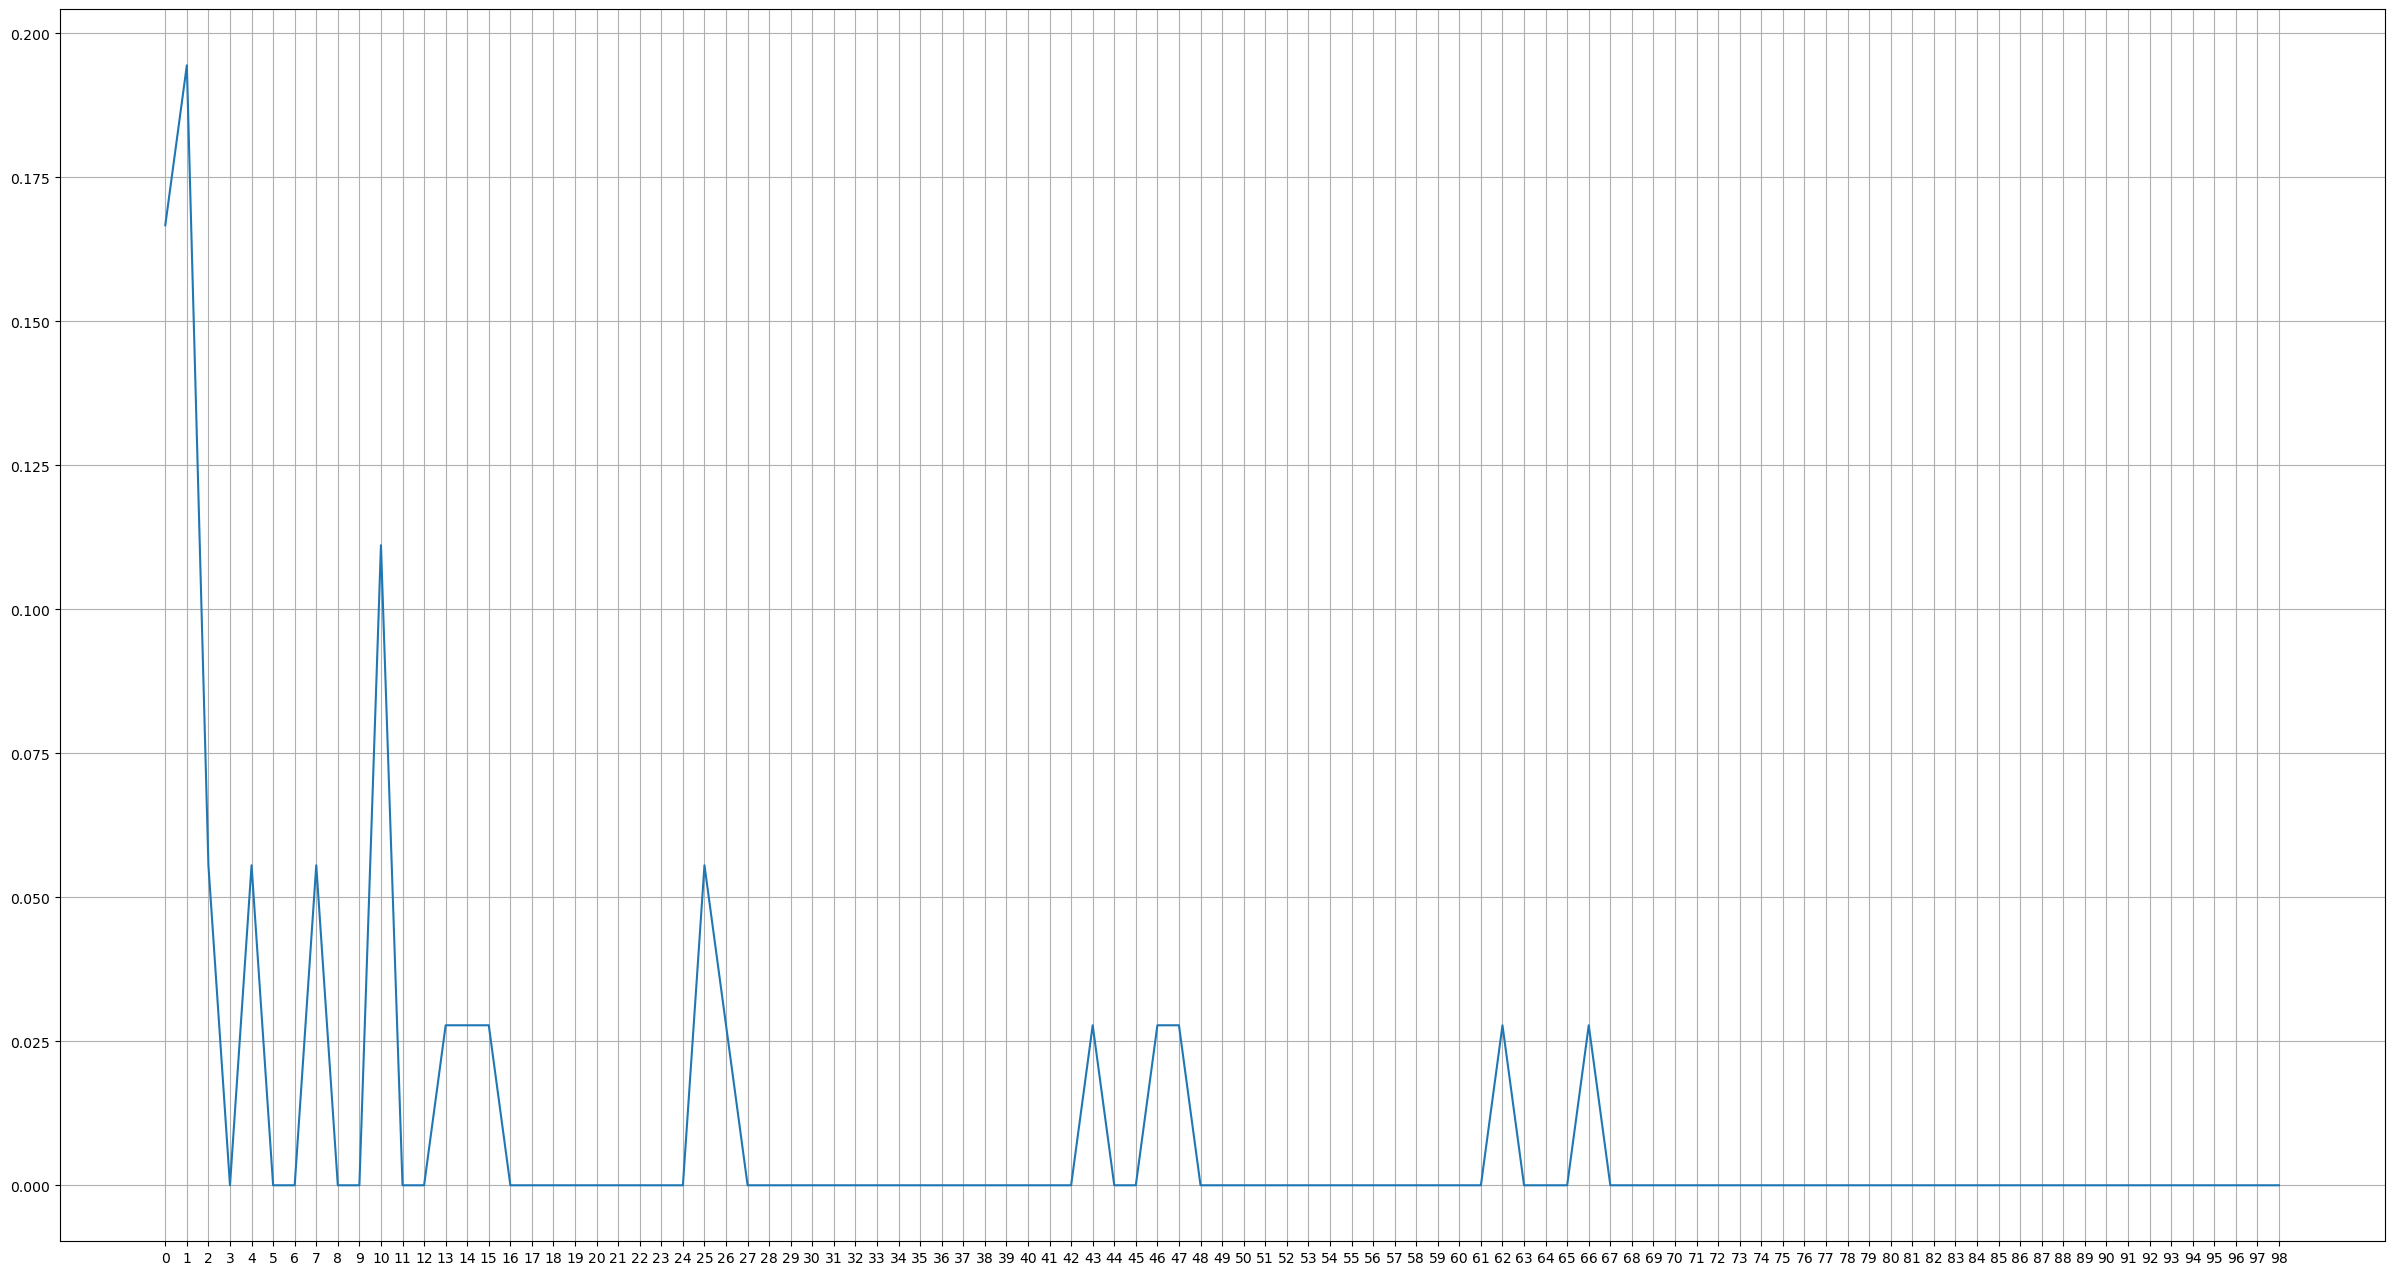

In [26]:
plt.figure(figsize=(30,16))
plt.plot(mse_l)
plt.grid(True)
plt.xticks(range(len(mse_l)))
plt.show()
